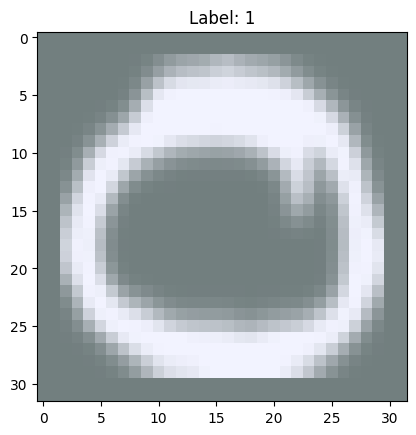

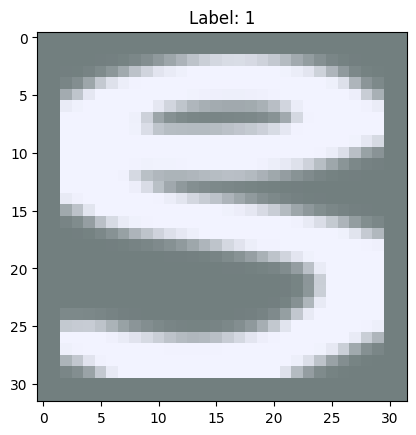

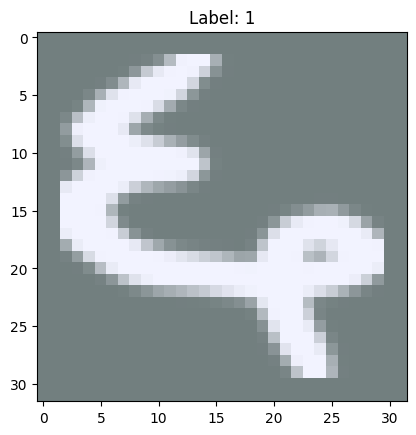

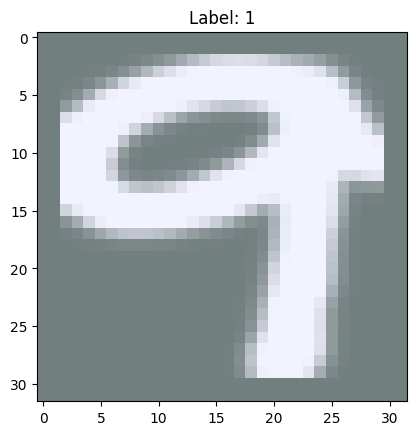

In [19]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define custom dataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.dataset = ImageFolder(root=self.root_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label= self.dataset[idx]  # Ignore labels from ImageFolder
        # label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0])))  # Get label from folder name
        return img, label

# Define transforms to apply to the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert PIL images to tensors
    transforms.Normalize(mean=[0.1, 0, 0], std=[1, 1.1, 1])  # Normalize pixel values to [-1, 1]
])

# Define path to the data
data_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Nepali-Digit')

# Create custom dataset
dataset = CustomDataset(root_dir=data_path, transform=transform)

# Create custom dataloader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Example usage
for images, labels in dataloader:
    # Process your batch here
    for i in range(len(images)):
        image = images[i]
        label = labels[i]
        # Convert image tensor to numpy array and transpose dimensions
        img_np = image.numpy().transpose((1, 2, 0))
        # Unnormalize image (multiply by standard deviation and add mean)
        img_np = img_np * 0.5 + 0.5
        plt.imshow(img_np)
        plt.title(f'Label: {label}')
        plt.show()
    break


In [ ]:

def __getitem__(self, idx):
        img, _ = self.dataset[idx]  # Ignore labels from ImageFolder
        label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0])))  # Get label from folder name
        return img, label

In [14]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader , Dataset, random_split

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.dataset = ImageFolder(root=self.root_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]  
        label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0]))) 
        return img, label


transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.Grayscale(num_output_channels= 3),  
    transforms.ToTensor(),        
    transforms.Normalize(mean=[0], std=[1])  
])

data_path = os.path.expanduser('~/Documents/Nepali-Digit')



dataset = CustomDataset(root_dir=data_path, transform=transform)


train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size


train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)




In [15]:
data_path

'/home/ishan-pc/Documents/Nepali-Digit'

In [16]:
# Iterate over the train_dataset and print out a few samples
for i in range(5):  # Print the first 5 samples
    sample_img, sample_label = train_dataset[i]
    print("Sample {} - Image Shape: {}, Label: {}".format(i+1, sample_img.shape, sample_label))


Sample 1 - Image Shape: torch.Size([3, 32, 32]), Label: 5
Sample 2 - Image Shape: torch.Size([3, 32, 32]), Label: 8
Sample 3 - Image Shape: torch.Size([3, 32, 32]), Label: 0
Sample 4 - Image Shape: torch.Size([3, 32, 32]), Label: 7
Sample 5 - Image Shape: torch.Size([3, 32, 32]), Label: 7


In [13]:
x = torch.Tensor([1.2])
print(x.item())

1.2000000476837158


In [11]:
x = torch.Tensor([1.2])
print(x)

tensor([1.2000])


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.dataset = ImageFolder(root=self.root_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]  
        label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0]))) 
        return img, label

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize((32, 32)),
    transforms.Grayscale(),      
    transforms.Normalize(mean=[0.5], std=[0.5])  
])

# Define dataset
data_path = os.path.expanduser('~/Documents/Nepali-Digit')
dataset = CustomDataset(root_dir=data_path, transform=transform)

# Define sizes for train, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Define data loaders
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32, 32)  
        self.fc2 = nn.Linear(32, 10)  

    def forward(self, x):
        x = torch.flatten(x, 1)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = ANN()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.001  )


train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 2
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()#computes gradient
        optimizer.step()#updates weights
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataloader)
    print(epoch_train_loss)
    epoch_train_accuracy = correct / total
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}")


    # Validation
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()
            
            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    epoch_val_loss = val_running_loss / len(val_dataloader)
    epoch_val_accuracy = correct / total
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)
    
    print(f"Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.2f}")

  0%|          | 0/2 [00:00<?, ?it/s]

0.9850745544041672
Epoch 1/2, Train Loss: 0.9851, Train Accuracy: 0.80


 50%|█████     | 1/2 [00:10<00:10, 10.94s/it]

Validation Loss: 0.6446, Validation Accuracy: 0.86
0.5548705385155874
Epoch 2/2, Train Loss: 0.5549, Train Accuracy: 0.88


100%|██████████| 2/2 [00:18<00:00,  9.09s/it]

Validation Loss: 0.4991, Validation Accuracy: 0.89


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm


# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.dataset = ImageFolder(root=self.root_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]  
        label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0]))) 
        return img, label


def load_data(data_path = os.path.expanduser('~/Documents/Nepali-Digit')):
    # Define transforms
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Resize((32, 32)),
        transforms.Grayscale(),      
        transforms.Normalize(mean=[0.1307], std=[0.3081])  
    ])

    # Define dataset

    dataset = CustomDataset(root_dir=data_path, transform=transform)

    # Define sizes for train, validation, and test sets
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    # Split dataset
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # Define data loaders
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32, 128)  
        self.fc2 = nn.Linear(128, 10)  

    def forward(self, x):
        x = torch.flatten(x, 1)  
        breakpoint()
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x



model = ANN()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001, momentum=0.45343)


train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 50
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()#computes gradient
        optimizer.step()#uodates weights
        running_loss += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataloader)
    epoch_train_accuracy = correct / total
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)


    # Validation
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()
            
            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    epoch_val_loss = val_running_loss / len(val_dataloader)
    epoch_val_accuracy = correct / total
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f},Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.2f}")

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:07<05:50,  7.16s/it]

Epoch 1/50, Train Loss: 1.9622, Train Accuracy: 0.53,Validation Loss: 1.6261, Validation Accuracy: 0.74


  4%|▍         | 2/50 [00:13<05:32,  6.93s/it]

Epoch 2/50, Train Loss: 1.3283, Train Accuracy: 0.80,Validation Loss: 1.0810, Validation Accuracy: 0.83


  6%|▌         | 3/50 [00:20<05:20,  6.81s/it]

Epoch 3/50, Train Loss: 0.9137, Train Accuracy: 0.85,Validation Loss: 0.7877, Validation Accuracy: 0.85


  8%|▊         | 4/50 [00:27<05:14,  6.84s/it]

Epoch 4/50, Train Loss: 0.6981, Train Accuracy: 0.86,Validation Loss: 0.6347, Validation Accuracy: 0.87


 10%|█         | 5/50 [00:34<05:06,  6.82s/it]

Epoch 5/50, Train Loss: 0.5784, Train Accuracy: 0.88,Validation Loss: 0.5443, Validation Accuracy: 0.88


 12%|█▏        | 6/50 [00:40<04:56,  6.74s/it]

Epoch 6/50, Train Loss: 0.5034, Train Accuracy: 0.89,Validation Loss: 0.4847, Validation Accuracy: 0.89


 14%|█▍        | 7/50 [00:47<04:47,  6.68s/it]

Epoch 7/50, Train Loss: 0.4516, Train Accuracy: 0.90,Validation Loss: 0.4414, Validation Accuracy: 0.89


 16%|█▌        | 8/50 [00:54<04:42,  6.72s/it]

Epoch 8/50, Train Loss: 0.4132, Train Accuracy: 0.90,Validation Loss: 0.4098, Validation Accuracy: 0.90


 18%|█▊        | 9/50 [01:01<04:41,  6.86s/it]

Epoch 9/50, Train Loss: 0.3831, Train Accuracy: 0.91,Validation Loss: 0.3836, Validation Accuracy: 0.90


 20%|██        | 10/50 [01:08<04:36,  6.92s/it]

Epoch 10/50, Train Loss: 0.3592, Train Accuracy: 0.91,Validation Loss: 0.3625, Validation Accuracy: 0.91


 22%|██▏       | 11/50 [01:15<04:31,  6.95s/it]

Epoch 11/50, Train Loss: 0.3393, Train Accuracy: 0.92,Validation Loss: 0.3448, Validation Accuracy: 0.91


 24%|██▍       | 12/50 [01:22<04:26,  7.00s/it]

Epoch 12/50, Train Loss: 0.3223, Train Accuracy: 0.92,Validation Loss: 0.3311, Validation Accuracy: 0.92


 26%|██▌       | 13/50 [01:29<04:19,  7.01s/it]

Epoch 13/50, Train Loss: 0.3077, Train Accuracy: 0.92,Validation Loss: 0.3178, Validation Accuracy: 0.92


 28%|██▊       | 14/50 [01:36<04:13,  7.04s/it]

Epoch 14/50, Train Loss: 0.2954, Train Accuracy: 0.93,Validation Loss: 0.3062, Validation Accuracy: 0.92


 30%|███       | 15/50 [01:43<04:08,  7.11s/it]

Epoch 15/50, Train Loss: 0.2839, Train Accuracy: 0.93,Validation Loss: 0.2970, Validation Accuracy: 0.92


 32%|███▏      | 16/50 [01:51<04:01,  7.10s/it]

Epoch 16/50, Train Loss: 0.2742, Train Accuracy: 0.93,Validation Loss: 0.2882, Validation Accuracy: 0.93


 34%|███▍      | 17/50 [01:58<03:54,  7.10s/it]

Epoch 17/50, Train Loss: 0.2652, Train Accuracy: 0.93,Validation Loss: 0.2801, Validation Accuracy: 0.93


 36%|███▌      | 18/50 [02:05<03:46,  7.09s/it]

Epoch 18/50, Train Loss: 0.2572, Train Accuracy: 0.93,Validation Loss: 0.2729, Validation Accuracy: 0.93


 38%|███▊      | 19/50 [02:12<03:41,  7.14s/it]

Epoch 19/50, Train Loss: 0.2498, Train Accuracy: 0.94,Validation Loss: 0.2667, Validation Accuracy: 0.93


 40%|████      | 20/50 [02:19<03:35,  7.17s/it]

Epoch 20/50, Train Loss: 0.2432, Train Accuracy: 0.94,Validation Loss: 0.2604, Validation Accuracy: 0.93


 42%|████▏     | 21/50 [02:26<03:26,  7.12s/it]

Epoch 21/50, Train Loss: 0.2371, Train Accuracy: 0.94,Validation Loss: 0.2556, Validation Accuracy: 0.93


 44%|████▍     | 22/50 [02:33<03:19,  7.13s/it]

Epoch 22/50, Train Loss: 0.2313, Train Accuracy: 0.94,Validation Loss: 0.2504, Validation Accuracy: 0.93


 46%|████▌     | 23/50 [02:40<03:11,  7.09s/it]

Epoch 23/50, Train Loss: 0.2262, Train Accuracy: 0.94,Validation Loss: 0.2460, Validation Accuracy: 0.94


 48%|████▊     | 24/50 [02:48<03:04,  7.10s/it]

Epoch 24/50, Train Loss: 0.2213, Train Accuracy: 0.94,Validation Loss: 0.2417, Validation Accuracy: 0.94


 50%|█████     | 25/50 [02:55<02:57,  7.10s/it]

Epoch 25/50, Train Loss: 0.2167, Train Accuracy: 0.94,Validation Loss: 0.2386, Validation Accuracy: 0.94


 52%|█████▏    | 26/50 [03:02<02:51,  7.16s/it]

Epoch 26/50, Train Loss: 0.2125, Train Accuracy: 0.95,Validation Loss: 0.2339, Validation Accuracy: 0.94


 54%|█████▍    | 27/50 [03:09<02:43,  7.13s/it]

Epoch 27/50, Train Loss: 0.2083, Train Accuracy: 0.95,Validation Loss: 0.2306, Validation Accuracy: 0.94


 56%|█████▌    | 28/50 [03:16<02:36,  7.10s/it]

Epoch 28/50, Train Loss: 0.2045, Train Accuracy: 0.95,Validation Loss: 0.2272, Validation Accuracy: 0.94


 58%|█████▊    | 29/50 [03:23<02:29,  7.10s/it]

Epoch 29/50, Train Loss: 0.2009, Train Accuracy: 0.95,Validation Loss: 0.2245, Validation Accuracy: 0.94


 60%|██████    | 30/50 [03:31<02:25,  7.27s/it]

Epoch 30/50, Train Loss: 0.1977, Train Accuracy: 0.95,Validation Loss: 0.2217, Validation Accuracy: 0.94


 62%|██████▏   | 31/50 [03:38<02:18,  7.29s/it]

Epoch 31/50, Train Loss: 0.1944, Train Accuracy: 0.95,Validation Loss: 0.2191, Validation Accuracy: 0.94


 64%|██████▍   | 32/50 [03:47<02:18,  7.68s/it]

Epoch 32/50, Train Loss: 0.1914, Train Accuracy: 0.95,Validation Loss: 0.2165, Validation Accuracy: 0.94


 66%|██████▌   | 33/50 [03:55<02:11,  7.74s/it]

Epoch 33/50, Train Loss: 0.1884, Train Accuracy: 0.95,Validation Loss: 0.2145, Validation Accuracy: 0.94


 68%|██████▊   | 34/50 [04:03<02:05,  7.82s/it]

Epoch 34/50, Train Loss: 0.1858, Train Accuracy: 0.95,Validation Loss: 0.2114, Validation Accuracy: 0.94


 70%|███████   | 35/50 [04:09<01:51,  7.43s/it]

Epoch 35/50, Train Loss: 0.1833, Train Accuracy: 0.95,Validation Loss: 0.2096, Validation Accuracy: 0.94


 72%|███████▏  | 36/50 [04:16<01:39,  7.13s/it]

Epoch 36/50, Train Loss: 0.1806, Train Accuracy: 0.95,Validation Loss: 0.2077, Validation Accuracy: 0.94


 74%|███████▍  | 37/50 [04:22<01:29,  6.92s/it]

Epoch 37/50, Train Loss: 0.1784, Train Accuracy: 0.96,Validation Loss: 0.2055, Validation Accuracy: 0.94


 76%|███████▌  | 38/50 [04:28<01:21,  6.78s/it]

Epoch 38/50, Train Loss: 0.1759, Train Accuracy: 0.96,Validation Loss: 0.2037, Validation Accuracy: 0.94


 78%|███████▊  | 39/50 [04:35<01:13,  6.67s/it]

Epoch 39/50, Train Loss: 0.1739, Train Accuracy: 0.96,Validation Loss: 0.2017, Validation Accuracy: 0.95


 80%|████████  | 40/50 [04:41<01:06,  6.60s/it]

Epoch 40/50, Train Loss: 0.1716, Train Accuracy: 0.96,Validation Loss: 0.2000, Validation Accuracy: 0.95


 82%|████████▏ | 41/50 [04:48<00:58,  6.50s/it]

Epoch 41/50, Train Loss: 0.1695, Train Accuracy: 0.96,Validation Loss: 0.1986, Validation Accuracy: 0.95


 84%|████████▍ | 42/50 [04:54<00:52,  6.53s/it]

Epoch 42/50, Train Loss: 0.1676, Train Accuracy: 0.96,Validation Loss: 0.1970, Validation Accuracy: 0.95


 86%|████████▌ | 43/50 [05:01<00:46,  6.59s/it]

Epoch 43/50, Train Loss: 0.1658, Train Accuracy: 0.96,Validation Loss: 0.1954, Validation Accuracy: 0.95


 88%|████████▊ | 44/50 [05:07<00:39,  6.59s/it]

Epoch 44/50, Train Loss: 0.1641, Train Accuracy: 0.96,Validation Loss: 0.1942, Validation Accuracy: 0.95


 90%|█████████ | 45/50 [05:14<00:32,  6.52s/it]

Epoch 45/50, Train Loss: 0.1620, Train Accuracy: 0.96,Validation Loss: 0.1928, Validation Accuracy: 0.95


 92%|█████████▏| 46/50 [05:21<00:26,  6.59s/it]

Epoch 46/50, Train Loss: 0.1604, Train Accuracy: 0.96,Validation Loss: 0.1915, Validation Accuracy: 0.95


 94%|█████████▍| 47/50 [05:27<00:19,  6.60s/it]

Epoch 47/50, Train Loss: 0.1586, Train Accuracy: 0.96,Validation Loss: 0.1899, Validation Accuracy: 0.95


 96%|█████████▌| 48/50 [05:34<00:13,  6.56s/it]

Epoch 48/50, Train Loss: 0.1569, Train Accuracy: 0.96,Validation Loss: 0.1889, Validation Accuracy: 0.95


 98%|█████████▊| 49/50 [05:40<00:06,  6.58s/it]

Epoch 49/50, Train Loss: 0.1555, Train Accuracy: 0.96,Validation Loss: 0.1877, Validation Accuracy: 0.95


100%|██████████| 50/50 [05:48<00:00,  6.96s/it]

Epoch 50/50, Train Loss: 0.1540, Train Accuracy: 0.96,Validation Loss: 0.1863, Validation Accuracy: 0.95


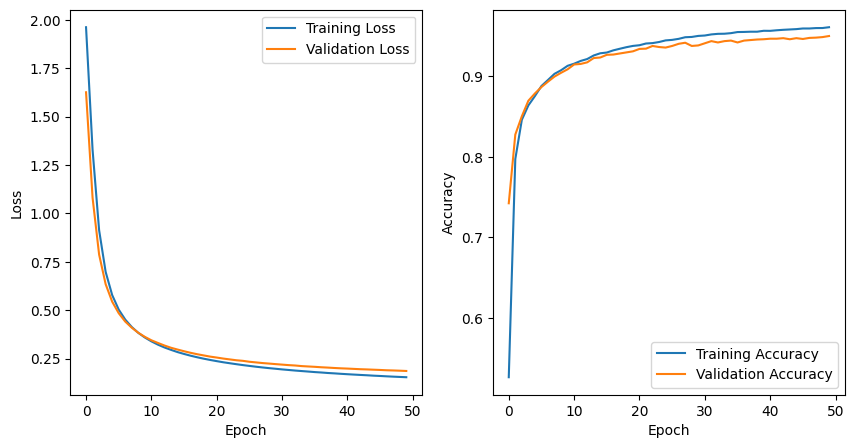

In [36]:
# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("accuracy2.png")

In [66]:
valiter = iter(val_dataloader)
im , lb = next(valiter)

In [55]:
import cv2
import torchvision

In [58]:
classes = ('0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' )

In [72]:
dataiter = iter(test_dataloader)
images1 , labels1 = next(dataiter)

labels1.shape

torch.Size([64])

In [73]:
labels1.shape

torch.Size([64])

In [74]:
out = model(images1)
out.shape

torch.Size([64, 10])

In [75]:
# _, predicted = torch.max(out, 1)

# print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
#                               for j in range(64)))


# predicted.shape

In [82]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images1, labels1 = data
        # print(len(labels1))
        # calculate outputs by running images through the network
        out = model(images1)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(out.data, 1)

        
        total += labels1.size(0)
        correct += (predicted == labels1).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
# print(len(labels1))
# print(len(predicted))

Accuracy of the network on the 10000 test images: 94 %


#Ray_Tune Hyperparameter tuning 

In [83]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader, Dataset, random_split
# from tqdm import tqdm
# from ray import tune 
# from ray.tune.schedulers import ASHAScheduler

# # Define custom dataset class
# class CustomDataset(Dataset):
#     def __init__(self, root_dir, transform=None):
#         self.root_dir = root_dir
#         self.transform = transform
#         self.dataset = ImageFolder(root=self.root_dir, transform=self.transform)

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         img, _ = self.dataset[idx]  
#         label = int(os.path.basename(os.path.dirname(self.dataset.imgs[idx][0]))) 
#         return img, label


# # Define transforms
# transform = transforms.Compose([
#     transforms.ToTensor(), 
#     transforms.Resize((32, 32)),
#     transforms.Grayscale(),      
#     transforms.Normalize(mean=[0.5], std=[0.5])  
# ])

# # Define dataset
# data_path = os.path.expanduser('~/Documents/Nepali-Digit')
# dataset = CustomDataset(root_dir=data_path, transform=transform)

# # Define sizes for train, validation, and test sets
# train_size = int(0.7 * len(dataset))
# val_size = int(0.15 * len(dataset))
# test_size = len(dataset) - train_size - val_size

# # Split dataset
# train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])



# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.fc1 = nn.Linear(32 * 32, 32)  
#         self.fc2 = nn.Linear(32, 10)  

#     def forward(self, x):
#         x = torch.flatten(x, 1)  
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x



# def train_ann(config):

#     batch_size = config["batch_size"]


#         # Define data loaders
#     train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#     test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#     model = ANN()

#     criterion = nn.CrossEntropyLoss()

#     if config["optimizer"] == "SGD":
#         optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=config["momentum"])
#     elif config["optimizer"] == "Adam":
#         optimizer = optim.Adam(model.parameters(), lr=config["lr"] ,  eps= config["eps"])
#     elif config["optimizer"] == "Adagrad":
#         optimizer = optim.Adagrad(model.parameters(), lr=config["lr"], eps = config["eps"] )
#     else:
#         raise ValueError("Unknown optimizer type")
    
#     train_loss_history = []
#     train_accuracy_history = []
#     val_loss_history = []
#     val_accuracy_history = []

#     # Training loop
#     num_epochs = 15
#     for epoch in tqdm(range(num_epochs)):
#         model.train()  # Set model to training mode
#         running_loss = 0.0
#         correct = 0
#         total = 0
#         for inputs, labels in train_dataloader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()#computes gradient
#             optimizer.step()#uodates weights
#             running_loss += loss.item()
            
#             # Calculate training accuracy
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
        
#         epoch_train_loss = running_loss / len(train_dataloader)
#         epoch_train_accuracy = correct / total
#         train_loss_history.append(epoch_train_loss)
#         train_accuracy_history.append(epoch_train_accuracy)
        
#         # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}")
        
#         # Validation
#         model.eval()  # Set model to evaluation mode
#         correct = 0
#         total = 0
#         val_running_loss = 0.0
#         with torch.no_grad():
#             for inputs, labels in val_dataloader:
#                 outputs = model(inputs)
#                 val_loss = criterion(outputs, labels)
#                 val_running_loss += val_loss.item()
                
#                 # Calculate validation accuracy
#                 _, predicted = torch.max(outputs, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()
                
#         epoch_val_loss = val_running_loss / len(val_dataloader)
#         epoch_val_accuracy = correct / total
#         val_loss_history.append(epoch_val_loss)
#         val_accuracy_history.append(epoch_val_accuracy)
        
#         # print(f"Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.2f}")

# #         return {
# #             "loss": epoch_val_loss,
# #             "accuracy":epoch_val_accuracy,
# #             "train_loss_history": train_loss_history,
# #             "val_loss_history": val_loss_history,
# #             "val_accuracy_history": val_accuracy_history
# #         }
    


# # search_space= {
# #     "batch_size":tune.choice([16 , 32 , 64 , 128]),
# #     "lr": tune.loguniform(1e-4 , 1e-1),
# #     "momentum":tune.uniform(0.1 , 0.9),
# #     "optimizer":tune.choice(["SGD" , "Adam" , "Adagrad"]),
# #     "betas": tune.uniform(1e-8 , 1e-2),
# #     "eps":tune.uniform(1e-8 , 1e-2)
    
# }


# # # Define scheduler
# # scheduler = ASHAScheduler(
# #     metric="loss",
# #     mode="min",
# #     # max_t= num_epochs,
# #     grace_period=1,
# #     reduction_factor=2
# # )

# # # Run hyperparameter search
# # analysis = tune.run(
# #     train_ann,
# #     config=search_space,
# #     num_samples=10,
# #     scheduler=scheduler,
# #     progress_reporter=tune.CLIReporter()
# # )